<a href="https://www.kaggle.com/code/zengxing1212321/notebooked3b2c0b35?scriptVersionId=111195596" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

差分序列的白噪声检验结果为：
     lb_stat     lb_pvalue
1  36.459646  1.558599e-09
(-2.9947700517342084, 0.0353857066324933, 0, 61, {'1%': -3.542412746661615, '5%': -2.910236235808284, '10%': -2.5927445767266866}, -236.2276827580912)


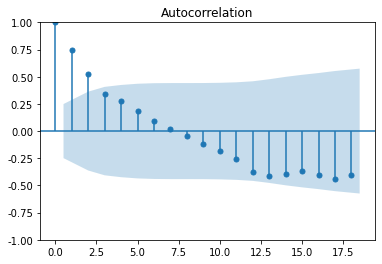

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


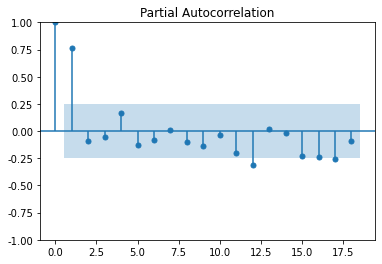

1
                            AutoReg Model Results                             
Dep. Variable:                   Open   No. Observations:                   62
Model:                    AutoReg(29)   Log Likelihood                 123.510
Method:               Conditional MLE   S.D. of innovations              0.006
Date:                Wed, 16 Nov 2022   AIC                           -185.020
Time:                        15:54:55   BIC                           -138.628
Sample:                            29   HQIC                          -169.411
                                   62                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4867      1.223     12.663      0.000      13.090      17.884
Open.L1       -0.1229      0.084     -1.469      0.142      -0.287       0.041
Open.L2       -0.0226      0.077     -0.294      0

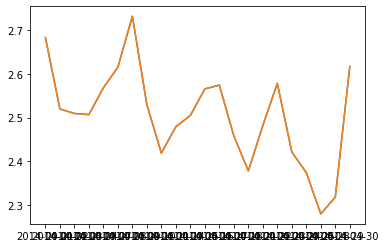

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


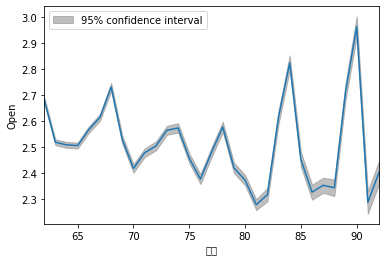

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller as ADF

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文支持
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

df = pd.read_csv(r"../input/chinabank/ChinaBank.csv")

# # # 查看数据的变化趋势
x = df['Date']
open_day = '2014-01-01'
close_day = '2014-04-01'
con1 = df['Date'] >= open_day
con2 = df['Date'] < close_day
x = x[con1 & con2]

y = df['Open']
y = y.head(62)

train = df.loc[:, ['Date', 'Open']]
open_day = '2014-01-01'
close_day = '2014-04-01'
con1 = train['Date'] >= open_day
con2 = train['Date'] < close_day
train = train[con1 & con2]

test = df.loc[:, ['Date', 'Open']]
open_day = '2014-04-01'
close_day = '2014-05-01'
con1 = test['Date'] >= open_day
con2 = test['Date'] < close_day
test = test[con1 & con2]

x1 = test['Date']
y1 = test['Open']

# #白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox

print('差分序列的白噪声检验结果为：')
print(acorr_ljungbox(y, lags=1))
# #

print(ADF(y))

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 自相关图
plot_acf(y).show()
plt.show()

# 偏自相关图
plot_pacf(y).show()
plt.show()

from statsmodels.tsa.ar_model import AutoReg

# 选取最佳阶数，采用AIC准则
best_param_p = 0  # 初始化p
initial_thred = 100000  # 初始化AIC的阈值，随便选一个较大的数
rs = 0  # 初始化残差项

for p in range(0, 30):
    model = AutoReg(y, p)
    res = model.fit()
    resid_p_value = ADF(res.resid)[1]
    aic = res.aic
    if (aic < initial_thred) and (resid_p_value < 0.05):
        best_param_p = p
        initial_thred = aic
        rs = resid_p_value
# 最佳阶数
print(best_param_p)

print(res.summary())
pred = res.predict(len(y), end=len(y) + 31 - 1)

test['Open'] = pred
print(test)

x2 = test['Date']
y2 = test['Open']

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.title("")
plt.show()

fig = res.plot_predict(len(y), end=len(y) + 31 - 1)
ax = plt.gca()
ax.set_xlim(62, 92)
plt.xlabel('时间')  # 设置 x 轴名字
plt.ylabel('Open')
# 设置 y 轴名字
plt.show()
